In [51]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import featexp

In [52]:
loans = pd.read_csv('./accepted_imputed.csv', low_memory=False) #accepted_imputed
loans['loan_status'].value_counts(dropna=False)

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [53]:
openloans=['Current', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off']

loans=loans[~loans.loan_status.isin(openloans)]
loans.shape

(1345310, 91)

In [54]:
# Drop off Multicollinear Features
drop_cols = [ 'total_pymnt_inv', 'total_rec_prncp', 'funded_amnt',
             'funded_amnt_inv', 'num_actv_rev_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0']

print("Drop off Multicollinear Features: " + str(len(drop_cols)))
print(drop_cols)

#loans = loans.drop(drop_cols, axis=1)

Drop off Multicollinear Features: 9
['total_pymnt_inv', 'total_rec_prncp', 'funded_amnt', 'funded_amnt_inv', 'num_actv_rev_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0']


In [55]:
loans.shape

(1345310, 91)

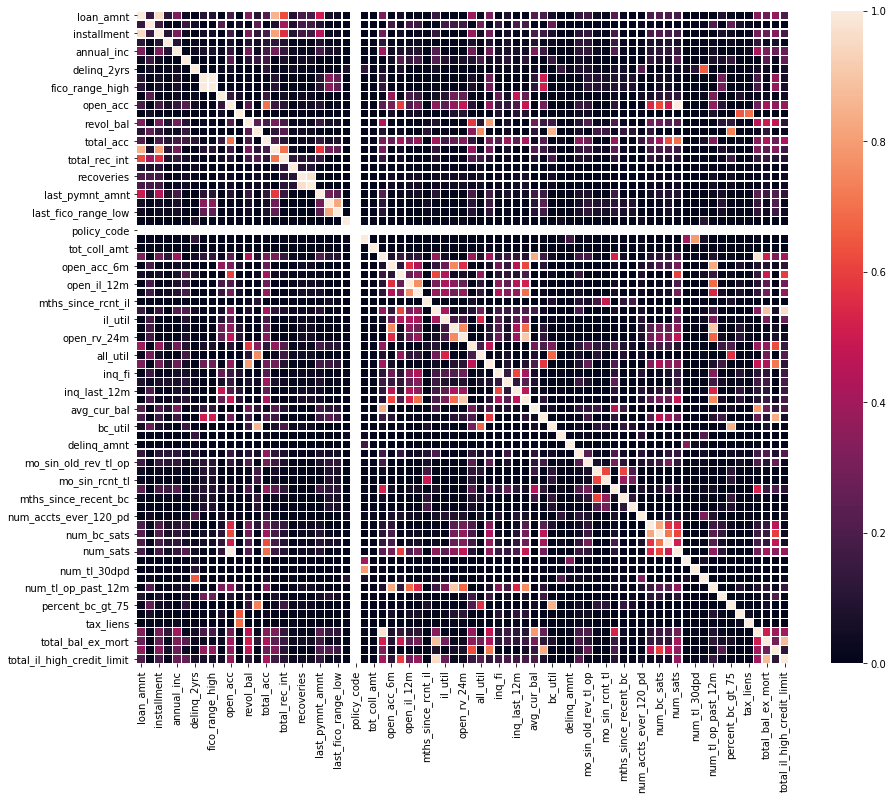

In [56]:
corrmat = loans.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat,linewidths=.5,vmin=0, vmax=1, square=True)

In [57]:
collinearity=corrmat.unstack().abs().sort_values(ascending=False)
collinearity[74:120]

open_acc                    num_sats                      0.998769
num_sats                    open_acc                      0.998769
tot_cur_bal                 tot_hi_cred_lim               0.972707
tot_hi_cred_lim             tot_cur_bal                   0.972707
collection_recovery_fee     recoveries                    0.970515
recoveries                  collection_recovery_fee       0.970515
total_bal_il                total_il_high_credit_limit    0.960401
total_il_high_credit_limit  total_bal_il                  0.960401
installment                 loan_amnt                     0.953401
loan_amnt                   installment                   0.953401
open_rv_24m                 acc_open_past_24mths          0.908950
acc_open_past_24mths        open_rv_24m                   0.908950
num_tl_op_past_12m          open_rv_12m                   0.903914
open_rv_12m                 num_tl_op_past_12m            0.903914
total_bal_ex_mort           total_bal_il                  0.88

In [58]:
fractions=[['num_sats','tot_cur_bal','collection_recovery_fee','total_bal_il','installment','total_bal_ex_mort','open_rv_24m','open_rv_12m','revol_util','last_fico_range_low'],['open_acc','tot_hi_cred_lim','recoveries','total_il_high_credit_limit','loan_amnt','total_bal_il','acc_open_past_24mths','num_tl_op_past_12m','bc_util','last_fico_range_high']]
for x,y in zip(fractions[0],fractions[1]):
    loans[x]=np.divide(loans[x],loans[y])
    print('%s expressed as a fraction of %s' %(x, y)) 

num_sats expressed as a fraction of open_acc
tot_cur_bal expressed as a fraction of tot_hi_cred_lim
collection_recovery_fee expressed as a fraction of recoveries
total_bal_il expressed as a fraction of total_il_high_credit_limit
installment expressed as a fraction of loan_amnt
total_bal_ex_mort expressed as a fraction of total_bal_il
open_rv_24m expressed as a fraction of acc_open_past_24mths
open_rv_12m expressed as a fraction of num_tl_op_past_12m
revol_util expressed as a fraction of bc_util
last_fico_range_low expressed as a fraction of last_fico_range_high


In [59]:
corrmat = loans.corr()
collinearity=corrmat.unstack().abs().sort_values(ascending=False)
collinearity[74:120]


total_pymnt            loan_amnt                0.854348
loan_amnt              total_pymnt              0.854348
bc_util                percent_bc_gt_75         0.850324
percent_bc_gt_75       bc_util                  0.850324
total_bc_limit         bc_open_to_buy           0.836818
bc_open_to_buy         total_bc_limit           0.836818
num_bc_sats            num_actv_bc_tl           0.829931
num_actv_bc_tl         num_bc_sats              0.829931
num_tl_op_past_12m     open_acc_6m              0.824706
open_acc_6m            num_tl_op_past_12m       0.824706
total_rev_hi_lim       revol_bal                0.801389
revol_bal              total_rev_hi_lim         0.801389
acc_now_delinq         num_tl_30dpd             0.794215
num_tl_30dpd           acc_now_delinq           0.794215
avg_cur_bal            tot_hi_cred_lim          0.792223
tot_hi_cred_lim        avg_cur_bal              0.792223
open_il_24m            open_il_12m              0.765796
open_il_12m            open_il_

In [60]:
loans.isna().sum(axis=0)[loans.isna().sum(axis=0)>0].index

Index(['revol_util', 'collection_recovery_fee', 'last_fico_range_low',
       'tot_cur_bal', 'total_bal_il', 'open_rv_12m', 'open_rv_24m', 'num_sats',
       'total_bal_ex_mort'],
      dtype='object')

In [61]:
loans['revol_util'].fillna('None', inplace=True)
loans['emp_title'].fillna('None', inplace=True)
loans['collection_recovery_fee'].fillna(1, inplace=True)
loans['tot_cur_bal'].fillna(0, inplace=True)
loans['total_bal_il'].fillna(0, inplace=True)
loans['num_sats'].fillna(0, inplace=True)
loans['total_bal_ex_mort'].fillna(0, inplace=True)
loans['open_rv_12m'].fillna(0, inplace=True)
loans['open_rv_24m'].fillna(0, inplace=True)
loans['last_fico_range_low'].fillna(0, inplace=True)

In [62]:
loans.isna().sum(axis=0)[loans.isna().sum(axis=0)>0].index

Index([], dtype='object')

In [63]:
for col in loans.columns:
    if loans[col].dtype!='float64':
        print(col)

term
grade
sub_grade
emp_title
home_ownership
verification_status
issue_d
loan_status
pymnt_plan
purpose
title
zip_code
addr_state
revol_util
initial_list_status
application_type
hardship_flag
disbursement_method
debt_settlement_flag


In [64]:
loans.to_csv('loans_terminated.csv',index=False)

# term, grade, sub_grade, home_ownership, verification_status,  addr_state to be dummified
# (cont. to be dummified) initial_list_status, application_type,  disbursement_method, 
cols=['term','grade', 'sub_grade', 'home_ownership', 'verification_status',  'addr_state', 'initial_list_status', 'application_type',  'disbursement_method']
loans=pd.get_dummies(loans, prefix_sep="__",columns=cols)

# emp_title, issue_d, purpose, title to be dropped for now, possibly used later
# pymnt_plan,hardship_flag, debt_settlement_flag to be removed for not being realistic predictors
# 'total_pymnt', 'total_rec_int','total_rec_late_fee', 'recoveries', 'collection_recovery_fee', to be removed for not being realistic predictors
loans=loans.drop(columns=['emp_title', 'issue_d', 'purpose', 'pymnt_plan','hardship_flag', 'debt_settlement_flag'])
loans=loans.drop(columns=['total_pymnt', 'total_rec_int','total_rec_late_fee', 'recoveries', 'collection_recovery_fee'])
# zip_code to lose two xs and become numeric
loans['zip_code']=[x.replace(' ', '')[:-2] for x in loans['zip_code']]
loans['zip_code']=loans['zip_code'].astype(float)

In [65]:
loans.to_csv('loans_clean_complete.csv',index=False)
